In [1]:
# import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# import the data

users_data = pd.read_pickle("../data/users_data_final.pkl")

# preview the data 
users_data.head(n = 3)

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile


In [3]:
# check the shape of data

users_data.shape

(45209, 19)

In [4]:
print("# of rows:", users_data.shape[0])
print("# of columns:", users_data.shape[1])


# of rows: 45209
# of columns: 19


In [5]:
# structure of the data

users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

In [6]:
# create a target
target = users_data.default.value_counts(normalize = True)
target

# 98% of the data is default, which will make it impossible to predict users that have defaulted.
# This is also an example of imbalanced data, so we could create synthetic data, but based on the distribution I would say this is not a useful target.

False    0.981973
True     0.018027
Name: default, dtype: float64

In [7]:
# as a proxy I would use total_amount_usd, 
# and my assumption would be higher values less likely to default

target = users_data.total_amount_usd
target

0        2143.0
1           NaN
2           2.0
3           NaN
4           1.0
          ...  
45211     825.0
45212    1729.0
45213    5715.0
45214       NaN
45215    2971.0
Name: total_amount_usd, Length: 45209, dtype: float64

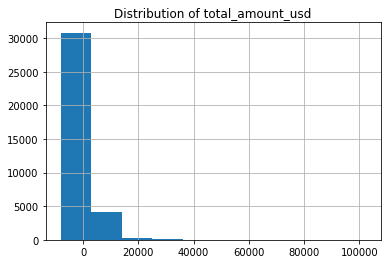

In [8]:
# visualise the target

target.hist()
plt.title("Distribution of total_amount_usd")
plt.show()

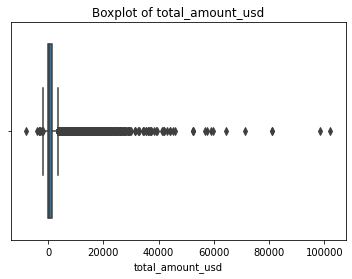

In [9]:
# visualise the target

sns.boxplot(x=target)
plt.title("Boxplot of total_amount_usd")
plt.show()

In [10]:
# drop features we identified as redundant

cols_to_drop = ['user_id', 'default']
print(users_data.shape)
users_data_cleaned = users_data.drop(cols_to_drop, axis = 1)
print(users_data_cleaned.shape)


(45209, 19)
(45209, 17)


In [11]:
# handling missing data

def identify_missing_data(df):
    """
    This function is used to identify missing data
    
    @param df pandas DataFrame
    
    @return a DataFrame with the percentage of missing data for every feature and the data types
    """
    
    percent_missing = df.isnull().mean()
    
    missing_value_df = pd.DataFrame(percent_missing).reset_index() # convert to DataFrame
    missing_value_df = missing_value_df.rename(columns = {"index" : "feature",
                                                                0 : "percent_missing"}) # rename columns

    missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending = False) # sort the values
    
    data_types_df = pd.DataFrame(df.dtypes).reset_index().rename(columns = {"index" : "feature",
                                                                0 : "data_type"}) # rename columns
    
    missing_value_df = missing_value_df.merge(data_types_df, on = "feature") # join the dataframe with datatype
    
    missing_value_df.percent_missing = round(missing_value_df.percent_missing*100, 2) # format the percent_missing
    
    return missing_value_df


In [12]:
missing_df = identify_missing_data(users_data_cleaned)
missing_df[missing_df["percent_missing"] > 0] 

,feature,percent_missing,data_type
0,poutcome,81.75,object
1,contact,28.80,object
2,total_amount_usd,22.12,float64
3,number_transactions,22.12,float64
4,education,4.11,object
5,job,0.64,object
6,device,0.21,object
7,date_joined,0.07,datetime64[ns]


In [13]:
# drop poutcome as it contians more than 40% missing data
threshold = 40

cols_to_drop = list(missing_df[missing_df["percent_missing"] > threshold].feature)

print(users_data_cleaned.shape)
users_data_cleaned = users_data_cleaned.drop(cols_to_drop, axis = 1)
print(users_data_cleaned.shape)


(45209, 17)
(45209, 16)


In [14]:
missing_df = identify_missing_data(users_data_cleaned)
missing_df[missing_df["percent_missing"] > 0] 

,feature,percent_missing,data_type
0,contact,28.80,object
1,number_transactions,22.12,float64
2,total_amount_usd,22.12,float64
3,education,4.11,object
4,job,0.64,object
5,device,0.21,object
6,date_joined,0.07,datetime64[ns]


In [15]:
# drop rows where 
print(users_data_cleaned.shape)
users_data_cleaned = users_data_cleaned[~users_data_cleaned['date_joined'].isnull()]
print(users_data_cleaned.shape)


(45209, 16)
(45179, 16)


In [16]:
missing_df = identify_missing_data(users_data_cleaned)
missing_df[missing_df["percent_missing"] > 0] 

,feature,percent_missing,data_type
0,contact,28.80,object
1,number_transactions,22.11,float64
2,total_amount_usd,22.11,float64
3,education,4.11,object
4,job,0.64,object
5,device,0.21,object


In [17]:
# handle all numerical missing data
users_data_cleaned['total_amount_usd'].fillna(0, inplace = True)
users_data_cleaned['number_transactions'].fillna(0, inplace = True)

In [18]:
# handle all non numerical missing data
users_data_cleaned.device.fillna("Unknown", inplace = True) # replace the missing values in device with Unknown
users_data_cleaned.education.fillna("Unknown", inplace = True) # replace the missing values in education with Unknown
users_data_cleaned.contact.fillna("Unknown", inplace = True) # replace the missing values in contact with Unknown
users_data_cleaned.job.fillna("Unknown", inplace = True) # replace the missing values in job with Unknown


In [19]:
missing_df = identify_missing_data(users_data_cleaned)
missing_df[missing_df["percent_missing"] > 0]

# yay, no more missing data

,feature,percent_missing,data_type


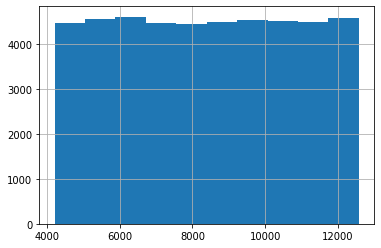

In [20]:
# transforming date_joined
# creating a new feature called tenure

users_data_cleaned["tenure"] = (pd.to_datetime('today') - 
                                users_data_cleaned["date_joined"]).dt.days
# check the distribution of this feature
users_data_cleaned["tenure"].hist();


In [21]:
# check the new tenure feature

users_data_cleaned.sample(3)[["date_joined", "tenure"]]

,date_joined,tenure
14732,2003-01-24,7074
24483,2005-02-01,6335
5261,2010-04-27,4424


In [22]:
# drop the date joined variable
print(users_data_cleaned.shape)
users_data_cleaned = users_data_cleaned.drop(["date_joined"], axis = 1)
print(users_data_cleaned.shape)


(45179, 17)
(45179, 16)


In [23]:
# encode the categorical variables
# start with the job variable

dummies = pd.get_dummies(users_data_cleaned["job"], prefix="job")
dummies

,job_Unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45211,0,0,0,0,0,0,0,0,0,0,1,0
45212,0,0,0,0,0,0,1,0,0,0,0,0
45213,0,0,0,0,0,0,1,0,0,0,0,0
45214,0,0,1,0,0,0,0,0,0,0,0,0


In [24]:
users_data_cleaned.job.value_counts()

blue-collar      9725
management       9453
technician       7592
admin.           5168
services         4152
retired          2262
self-employed    1577
entrepreneur     1485
unemployed       1301
housemaid        1239
student           937
Unknown           288
Name: job, dtype: int64

In [25]:
print(users_data_cleaned.shape)
users_data_cleaned = pd.concat([users_data_cleaned, dummies], axis=1)
print(users_data_cleaned.shape)
users_data_cleaned

(45179, 16)
(45179, 28)


,number_transactions,total_amount_usd,age,job,marital,education,housing,loan,contact,duration,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,3.0,2143.0,58,management,married,tertiary,True,False,Unknown,261,...,0,0,0,1,0,0,0,0,0,0
1,0.0,0.0,44,technician,single,secondary,True,False,Unknown,151,...,0,0,0,0,0,0,0,0,1,0
2,2.0,2.0,33,entrepreneur,married,secondary,True,True,Unknown,76,...,0,1,0,0,0,0,0,0,0,0
3,0.0,0.0,47,blue-collar,married,Unknown,True,False,Unknown,92,...,1,0,0,0,0,0,0,0,0,0
4,1.0,1.0,33,Unknown,single,Unknown,False,False,Unknown,198,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,2.0,825.0,51,technician,married,tertiary,False,False,cellular,977,...,0,0,0,0,0,0,0,0,1,0
45212,4.0,1729.0,71,retired,divorced,primary,False,False,cellular,456,...,0,0,0,0,1,0,0,0,0,0
45213,2.0,5715.0,72,retired,married,secondary,False,False,cellular,1127,...,0,0,0,0,1,0,0,0,0,0
45214,0.0,0.0,57,blue-collar,married,secondary,False,False,telephone,508,...,1,0,0,0,0,0,0,0,0,0


In [26]:
print(users_data_cleaned.shape)
users_data_cleaned = users_data_cleaned.drop("job", axis = 1)
print(users_data_cleaned.shape)
list(users_data_cleaned)

(45179, 28)
(45179, 27)


['number_transactions',
 'total_amount_usd',
 'age',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'device',
 'tenure',
 'job_Unknown',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed']

In [27]:
# encode the categorical variables

def one_hot(df, categorical_cols):
    """
    This definition can be used to one hot encode categorical data
    
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    
    @return a DataFrame with one-hot encoding
    """
    
    for c in categorical_cols:
        dummies = pd.get_dummies(df[c], prefix=c)
        df = pd.concat([df, dummies], axis=1)
        df.drop(c, axis = 1, inplace = True)
    
    return df

In [28]:
# identify all variables with data types object

categorical_cols = list(users_data_cleaned.select_dtypes(include = "object").columns)
print("# of variables with data type object:", len(categorical_cols))
categorical_cols

# of variables with data type object: 4


['marital', 'education', 'contact', 'device']

In [29]:
# encode all the variables

print(users_data_cleaned.shape)
users_data_cleaned_and_encoded = one_hot(users_data_cleaned, categorical_cols)
print(users_data_cleaned_and_encoded.shape)

(45179, 27)
(45179, 37)


In [30]:
# check for missing data and if any non numerical data type exists 
# bool, int and float are acceptable data types

users_data_cleaned_and_encoded.info()

# if any missing data left or non numerical data types, do not continue


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45179 entries, 0 to 45215
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_transactions  45179 non-null  float64
 1   total_amount_usd     45179 non-null  float64
 2   age                  45179 non-null  int64  
 3   housing              45179 non-null  bool   
 4   loan                 45179 non-null  bool   
 5   duration             45179 non-null  int64  
 6   campaign             45179 non-null  int64  
 7   pdays                45179 non-null  int64  
 8   previous             45179 non-null  int64  
 9   term_deposit         45179 non-null  bool   
 10  tenure               45179 non-null  int64  
 11  job_Unknown          45179 non-null  uint8  
 12  job_admin.           45179 non-null  uint8  
 13  job_blue-collar      45179 non-null  uint8  
 14  job_entrepreneur     45179 non-null  uint8  
 15  job_housemaid        45179 non-null 

In [31]:
# save file as a .pkl file

users_data_cleaned_and_encoded.to_pickle("../data/users_data_cleaned_and_encoded.pkl")